<a href="https://colab.research.google.com/github/Sebasangel10/Actividad3RegresionLinealMultiple/blob/main/Parte1_Angel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
Credicel = pd.read_excel('PrepCrit3.xlsx')

In [ ]:
# Separamos los datos cuantitativos también
CredicelNum = Credicel.select_dtypes(np.number)
CredicelNum

,folio,folio_solicitud,descuento,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,precio,costo_total,monto_financiado,semana,enganche
0,3,30,0.0,0.0,2,0,0,0,0,12,0.00,0.00,0.0,1949.0,2106.0,1169.0,81.0,780.0
1,4,33,0.0,0.0,2,0,0,0,0,12,0.00,0.00,0.0,2999.0,2925.0,1949.0,225.0,1050.0
2,5,37,0.0,0.0,3,0,0,0,0,12,0.00,0.00,0.0,1959.0,2210.0,1469.0,170.0,490.0
3,6,38,0.0,0.0,2,0,0,0,0,12,0.00,0.00,0.0,1959.0,2210.0,1469.0,170.0,490.0
4,7,44,0.0,0.0,1,0,0,0,0,0,0.00,0.00,0.0,4299.0,6942.0,3224.0,178.0,1075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,0.0,0.0,1,0,0,0,0,12,27.40,-1.13,0.0,3349.0,5486.0,3052.0,211.0,297.0
22731,22968,96479,0.0,0.0,1,0,0,0,0,12,19.00,7.48,0.0,4100.0,5200.0,2891.0,200.0,1209.0
22732,22969,96442,0.0,0.0,1,0,0,0,0,12,26.65,0.75,0.0,4849.0,6656.0,3697.0,256.0,1152.0
22733,22970,96536,0.0,0.0,1,0,0,0,0,12,-17.35,-0.14,0.0,3935.5,5448.5,3001.8,386.0,866.9


In [ ]:
# Encontramos todas las correlaciones entre las variables

Corr_Factors = CredicelNum.corr()
Corr_Factors

,folio,folio_solicitud,descuento,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,precio,costo_total,monto_financiado,semana,enganche
folio,1.000000,0.971332,0.130377,0.081637,-0.381641,-0.051590,-0.139744,-0.477863,-0.267134,-0.155777,0.079191,-0.162835,0.051272,0.099368,0.083302,0.090175,0.087642,0.145340
folio_solicitud,0.971332,1.000000,0.127074,0.071465,-0.378045,-0.051017,-0.130940,-0.467299,-0.250896,-0.166273,0.070725,-0.164206,0.051443,0.099848,0.083734,0.091934,0.089457,0.140092
descuento,0.130377,0.127074,1.000000,-0.006212,-0.076093,-0.035743,0.240813,0.040920,-0.016730,-0.084598,-0.076047,-0.052541,0.010055,0.025226,0.063645,0.041332,-0.013835,-0.016966
monto_accesorios,0.081637,0.071465,-0.006212,1.000000,-0.043031,0.029445,-0.050677,-0.062232,-0.026971,-0.037794,0.035799,-0.014758,0.017089,0.014991,0.057285,0.031201,0.025226,0.048327
status,-0.381641,-0.378045,-0.076093,-0.043031,1.000000,-0.155148,0.077710,0.251670,0.281953,0.046922,-0.064641,0.341099,-0.071000,-0.100296,-0.189435,-0.104797,0.123926,-0.093411
fraude,-0.051590,-0.051017,-0.035743,0.029445,-0.155148,1.000000,-0.045808,-0.290140,-0.053387,-0.063399,0.392310,-0.073775,-0.016999,0.066466,0.031811,0.044759,0.032923,0.077725
inversion,-0.139744,-0.130940,0.240813,-0.050677,0.077710,-0.045808,1.000000,0.183455,0.083254,0.066040,-0.081049,0.065859,-0.063877,-0.004382,0.025318,0.035502,0.013746,-0.113869
pagos_realizados,-0.477863,-0.467299,0.040920,-0.062232,0.251670,-0.290140,0.183455,1.000000,0.191830,0.243915,-0.255416,0.024403,-0.015991,0.026038,0.121676,0.057771,-0.112911,-0.085203
reautorizacion,-0.267134,-0.250896,-0.016730,-0.026971,0.281953,-0.053387,0.083254,0.191830,1.000000,-0.064210,-0.026374,-0.001910,0.003881,-0.058814,-0.086599,-0.066025,0.001741,-0.023939
puntos,-0.155777,-0.166273,-0.084598,-0.037794,0.046922,-0.063399,0.066040,0.243915,-0.064210,1.000000,-0.276875,-0.049513,0.010008,0.050766,0.120663,0.131933,0.041031,-0.201764


In [ ]:
# Se aplica valor absoluto

Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,folio,folio_solicitud,descuento,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_enganche,porc_tasa,score_buro,precio,costo_total,monto_financiado,semana,enganche
folio,1.000000,0.971332,0.130377,0.081637,0.381641,0.051590,0.139744,0.477863,0.267134,0.155777,0.079191,0.162835,0.051272,0.099368,0.083302,0.090175,0.087642,0.145340
folio_solicitud,0.971332,1.000000,0.127074,0.071465,0.378045,0.051017,0.130940,0.467299,0.250896,0.166273,0.070725,0.164206,0.051443,0.099848,0.083734,0.091934,0.089457,0.140092
descuento,0.130377,0.127074,1.000000,0.006212,0.076093,0.035743,0.240813,0.040920,0.016730,0.084598,0.076047,0.052541,0.010055,0.025226,0.063645,0.041332,0.013835,0.016966
monto_accesorios,0.081637,0.071465,0.006212,1.000000,0.043031,0.029445,0.050677,0.062232,0.026971,0.037794,0.035799,0.014758,0.017089,0.014991,0.057285,0.031201,0.025226,0.048327
status,0.381641,0.378045,0.076093,0.043031,1.000000,0.155148,0.077710,0.251670,0.281953,0.046922,0.064641,0.341099,0.071000,0.100296,0.189435,0.104797,0.123926,0.093411
fraude,0.051590,0.051017,0.035743,0.029445,0.155148,1.000000,0.045808,0.290140,0.053387,0.063399,0.392310,0.073775,0.016999,0.066466,0.031811,0.044759,0.032923,0.077725
inversion,0.139744,0.130940,0.240813,0.050677,0.077710,0.045808,1.000000,0.183455,0.083254,0.066040,0.081049,0.065859,0.063877,0.004382,0.025318,0.035502,0.013746,0.113869
pagos_realizados,0.477863,0.467299,0.040920,0.062232,0.251670,0.290140,0.183455,1.000000,0.191830,0.243915,0.255416,0.024403,0.015991,0.026038,0.121676,0.057771,0.112911,0.085203
reautorizacion,0.267134,0.250896,0.016730,0.026971,0.281953,0.053387,0.083254,0.191830,1.000000,0.064210,0.026374,0.001910,0.003881,0.058814,0.086599,0.066025,0.001741,0.023939
puntos,0.155777,0.166273,0.084598,0.037794,0.046922,0.063399,0.066040,0.243915,0.064210,1.000000,0.276875,0.049513,0.010008,0.050766,0.120663,0.131933,0.041031,0.201764


<Axes: >

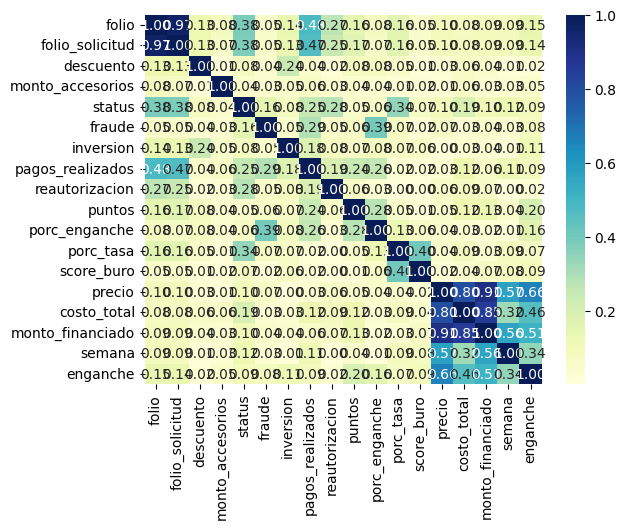

In [ ]:
# Graficamos el mapa de calor de los coeficientes de correlación

Heat_Map1 = sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot = True, fmt = ".2f")
Heat_Map1

In [ ]:
# Reducimos la selección de variables cuantitativas
CredicelNum2 = CredicelNum[['precio', 'costo_total','monto_financiado','semana','puntos','porc_enganche','enganche','pagos_realizados']]

In [ ]:
# Encontramos todas las correlaciones entre las variables

Corr_Factors2 = CredicelNum2.corr()
Corr_Factors2

,precio,costo_total,monto_financiado,semana,puntos,porc_enganche,enganche,pagos_realizados
precio,1.000000,0.797407,0.908594,0.573740,0.050766,0.043143,0.663595,0.026038
costo_total,0.797407,1.000000,0.853044,0.322446,0.120663,-0.034930,0.458437,0.121676
monto_financiado,0.908594,0.853044,1.000000,0.560739,0.131933,-0.023697,0.509798,0.057771
semana,0.573740,0.322446,0.560739,1.000000,0.041031,0.007160,0.344543,-0.112911
puntos,0.050766,0.120663,0.131933,0.041031,1.000000,-0.276875,-0.201764,0.243915
porc_enganche,0.043143,-0.034930,-0.023697,0.007160,-0.276875,1.000000,0.160679,-0.255416
enganche,0.663595,0.458437,0.509798,0.344543,-0.201764,0.160679,1.000000,-0.085203
pagos_realizados,0.026038,0.121676,0.057771,-0.112911,0.243915,-0.255416,-0.085203,1.000000


In [ ]:
# Se aplica valor absoluto

Corr_Factors2 = abs(Corr_Factors2)
Corr_Factors2

,precio,costo_total,monto_financiado,semana,puntos,porc_enganche,enganche,pagos_realizados
precio,1.000000,0.797407,0.908594,0.573740,0.050766,0.043143,0.663595,0.026038
costo_total,0.797407,1.000000,0.853044,0.322446,0.120663,0.034930,0.458437,0.121676
monto_financiado,0.908594,0.853044,1.000000,0.560739,0.131933,0.023697,0.509798,0.057771
semana,0.573740,0.322446,0.560739,1.000000,0.041031,0.007160,0.344543,0.112911
puntos,0.050766,0.120663,0.131933,0.041031,1.000000,0.276875,0.201764,0.243915
porc_enganche,0.043143,0.034930,0.023697,0.007160,0.276875,1.000000,0.160679,0.255416
enganche,0.663595,0.458437,0.509798,0.344543,0.201764,0.160679,1.000000,0.085203
pagos_realizados,0.026038,0.121676,0.057771,0.112911,0.243915,0.255416,0.085203,1.000000


<Axes: >

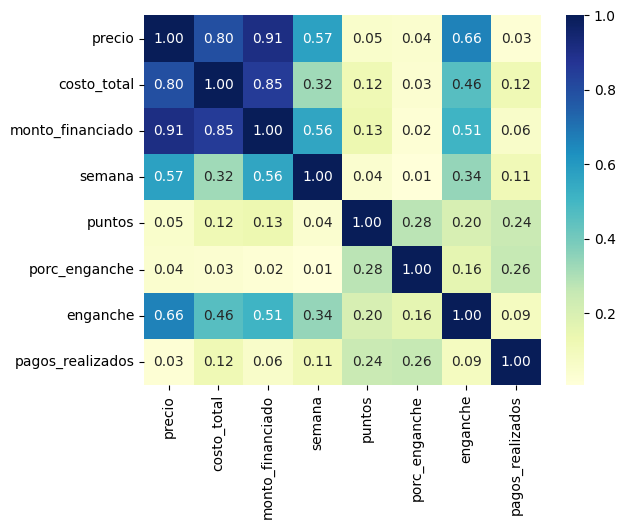

In [ ]:
# Graficamos el mapa de calor de los coeficientes de correlación

Heat_Map2 = sns.heatmap(Corr_Factors2, cmap = 'YlGnBu', annot = True, fmt = ".2f")
Heat_Map2

Regresión Múltiple de Enganche

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['puntos', 'porc_enganche', 'precio', 'costo_total', 'monto_financiado', 'semana']]
Var_Dep = CredicelNum['enganche']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['puntos', 'porc_enganche', 'precio', 'costo_total',
        'monto_financiado', 'semana'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-6.21923267e+00,  2.97611121e+00,  2.73075941e-01, -1.27880293e-03,
        -1.37265707e-01, -1.12965428e-01]),
 'rank_': 6,
 'singular_': array([358725.22490333, 105350.05800826,  45584.10885529,   8468.65335596,
          1419.68534229,    811.9482811 ]),
 'intercept_': 319.696625750169}

Modelo Matemático de Enganche: - 6.21923267e+00x1 + 2.97611121e+00x2 + 2.73075941e-01x3 - 1.27880293e-03x4 - 1.37265707e-01x5 - 1.12965428e-01x6 + 319.696625750169

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.5308082721728228

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7285659010500167

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['precio', 'costo_total', 'monto_financiado', 'semana']]
Var_Dep = CredicelNum['enganche']

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'monto_financiado', 'semana'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.29773183, -0.00419823, -0.16941789, -0.1239752 ]),
 'rank_': 4,
 'singular_': array([358725.18967221, 105349.97014647,  45583.34532406,   8468.62904999]),
 'intercept_': 254.41475451262204}

Segundo Modelo Matemático de Enganche: 0.29773183x1 - 0.00419823x2 - 0.16941789x3 - 0.1239752x4 + 254.41475451262204

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.4905793534334323

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7004137016317087

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['precio', 'costo_total', 'monto_financiado']]
Var_Dep = CredicelNum['enganche']

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'monto_financiado'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.2943948 , -0.00127943, -0.17598356]),
 'rank_': 3,
 'singular_': array([358691.14638106, 105210.79646561,  45553.6398987 ]),
 'intercept_': 243.5236777036274}

Tercer Modelo Matemático de Enganche: 0.2943948x1 - 0.00127943x2 - 0.17598356x3 + 243.5236777036274

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.49010021677877946

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.700071579753656

<Axes: >

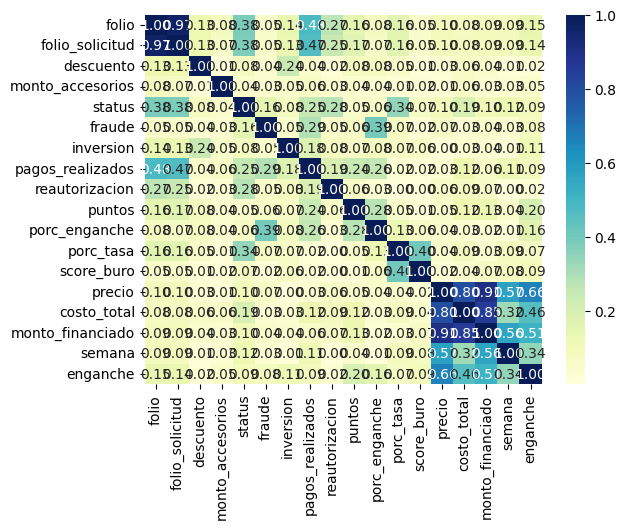

In [ ]:
# Graficamos el mapa de calor de los coeficientes de correlación

Heat_Map2 = sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot = True, fmt = ".2f")
Heat_Map2

<Axes: >

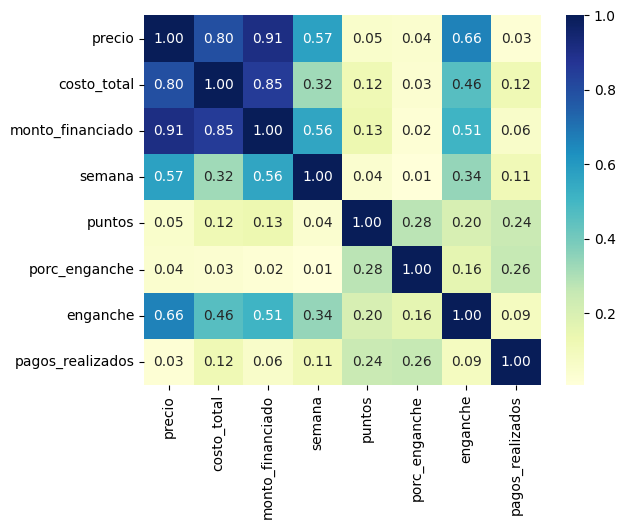

In [ ]:
# Graficamos el mapa de calor de los coeficientes de correlación

Heat_Map2 = sns.heatmap(Corr_Factors2, cmap = 'YlGnBu', annot = True, fmt = ".2f")
Heat_Map2

Regresión Múltiple de Pagos Realizados

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['folio', 'folio_solicitud', 'status', 'fraude', 'puntos', 'porc_enganche']]
Var_Dep = CredicelNum['pagos_realizados']

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['folio', 'folio_solicitud', 'status', 'fraude', 'puntos',
        'porc_enganche'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-6.28319098e-04, -1.04951525e-05,  5.17311364e-01, -1.00526109e+01,
         1.36958193e-01, -1.25038682e-01]),
 'rank_': 6,
 'singular_': array([4.22741045e+06, 2.30416359e+05, 1.43579933e+03, 8.15233268e+02,
        6.34254775e+01, 3.53410794e+01]),
 'intercept_': 16.214115089076735}

Modelo Matemático de Pagos Realizados: - 6.28319098e-04x1 - 1.04951525e-05x2 + 5.17311364e-01x3 - 1.00526109e+01x4 - 1.36958193e-01x5 - 1.25038682e-01x6 + 16.214115089076735

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.3546190857716065

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5954990224774567

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['folio', 'folio_solicitud', 'status', 'fraude']]
Var_Dep = CredicelNum['pagos_realizados']

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['folio', 'folio_solicitud', 'status', 'fraude'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-6.33582719e-04, -2.07569723e-05,  3.56677962e-01, -1.15412987e+01]),
 'rank_': 4,
 'singular_': array([4.22741044e+06, 2.30416353e+05, 6.36602793e+01, 3.84635646e+01]),
 'intercept_': 18.84141282137115}

Segundo Modelo Matemático de Pagos Realizados: - 6.33582719e-04x1 - 2.07569723e-05x2 + 3.56677962e-01x3 - 1.15412987e+01x4 + 18.84141282137115

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.328145642832251

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5728399801273049

In [ ]:
# Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep = CredicelNum[['folio', 'status', 'fraude']]
Var_Dep = CredicelNum['pagos_realizados']

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['folio', 'status', 'fraude'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-7.16592896e-04,  3.68096497e-01, -1.15359039e+01]),
 'rank_': 3,
 'singular_': array([9.95741905e+05, 6.36929537e+01, 3.84673834e+01]),
 'intercept_': 18.830497753287755}

Tercer Modelo Matemático de Pagos Realizados: - 7.16592896e-04x1 + 3.68096497e-01x2 - 1.15359039e+01x3 + 18.830497753287755

In [ ]:
# Corroboramos cual es el coeficiente de Determinación de nuestro modelo

coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.32795346549367477

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5726722147037298